# Principal Component Analysis of Wine Data

## by Damien Ha

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import numpy.linalg as la
import numpy.random as npr
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
wine = load_wine()

In [2]:
X = wine.data
y = wine.target
X.shape

(178, 13)

In [3]:
X_train, X_new, y_train, y_new = train_test_split(X, y, test_size=0.2, random_state=42)
df_describe = pd.DataFrame(data = X_train, columns = wine.feature_names)
df_describe.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.979085,2.373521,2.360845,19.473239,100.443662,2.289085,2.002113,0.368028,1.608028,5.057606,0.956380,2.592817,734.894366
std,0.820116,1.143934,0.279217,3.454792,14.650793,0.637715,1.004170,0.128269,0.583656,2.330917,0.234101,0.722141,302.323595
min,11.030000,0.890000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.420000,1.740000,0.480000,1.270000,278.000000
25%,12.332500,1.615000,2.210000,17.200000,88.250000,1.725000,1.125000,0.270000,1.250000,3.220000,0.782500,1.837500,502.500000
50%,13.010000,1.875000,2.360000,19.200000,98.000000,2.310000,2.075000,0.340000,1.555000,4.600000,0.965000,2.775000,660.000000
75%,13.677500,3.135000,2.540000,21.500000,107.000000,2.800000,2.842500,0.470000,1.967500,6.122500,1.120000,3.170000,932.750000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1547.000000


In [4]:
df_describe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       142 non-null    float64
 1   malic_acid                    142 non-null    float64
 2   ash                           142 non-null    float64
 3   alcalinity_of_ash             142 non-null    float64
 4   magnesium                     142 non-null    float64
 5   total_phenols                 142 non-null    float64
 6   flavanoids                    142 non-null    float64
 7   nonflavanoid_phenols          142 non-null    float64
 8   proanthocyanins               142 non-null    float64
 9   color_intensity               142 non-null    float64
 10  hue                           142 non-null    float64
 11  od280/od315_of_diluted_wines  142 non-null    float64
 12  proline                       142 non-null    float64
dtypes: fl

In [5]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

mu = np.mean(X_train,axis = 0, keepdims = True)
X_train_tilde = X_train - mu

X_train_tilde.shape

(142, 13)

In [6]:
U,S,VT = np.linalg.svd(X_train_tilde, full_matrices=False)

X_2D = X_train_tilde@VT[0:2,:].T
X_2D.shape 

(142, 2)

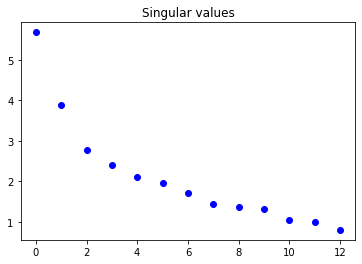

In [7]:
plt.plot(S,'bo')
plt.title('Singular values')
plt.show()

In [8]:
variance = (S[0]**2+S[1]**2)/np.sum(S**2)
variance

0.5884627463857175

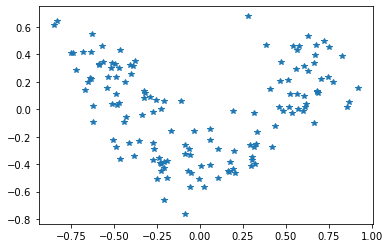

In [9]:
fig = plt.figure()
plt.plot(X_2D[:,0],X_2D[:,1], '*')
plt.show()

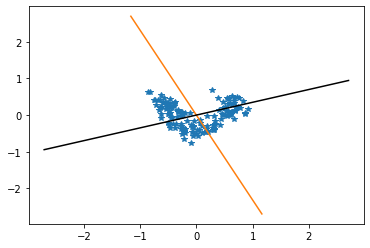

In [10]:
fig = plt.figure()
v1 = VT[0,:].T
Line_of_best_fit = np.zeros([10000,13])
i = 0

for t in np.linspace(-10,10,10000):
    Line_of_best_fit[i,:] = t*v1
    i +=1

v2 = VT[1,:].T
Line_v2 = np.zeros([10000,13])
i = 0
for t in np.linspace(-5,5,10000):
    Line_v2[i,:] = t*v2
    i +=1
    

plt.plot(X_2D[:,0],X_2D[:,1], '*', Line_of_best_fit[:,0],Line_of_best_fit[:,1], Line_v2[:,0], Line_v2[:,1],'k')
plt.show()

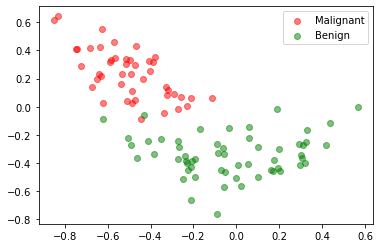

In [11]:
fig = plt.figure()
colors = ['red', 'green']
labels = ["Malignant", "Benign"]
for i in range(0,2):
    plt.scatter(X_2D[:,0][y_train == i],X_2D[:,1][y_train == i], color = colors[i], alpha=0.5, label=labels[i])
plt.legend()
plt.show()

PCA stands for principal component analysis, a technique for analyzing data with a large number of dimensions or features per observation. It linearly transforms the data to a subspace that approximates the original data in a lower dimension. The scatter plots above have taken the wine data and reduced it to two dimensions from its original `(178, 13)` shape.

The variance calculated in the 8th cell shows that the first singular vector accounts for about 58.85% of the data, so a second dimensions is probably needed.

In the very last scatter plot, there looks to be two distinct classes, so using this representation from PCA we could probably classify the data along those classes.